In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [104]:
def f(omega2, omega3, theta):
    omega1 = 1 - omega2 - omega3
    det = omega1*omega2 + omega1*omega3*np.sin(theta)**2 + omega2*omega3*np.cos(theta)**2
    part1 = 1/det * (1 + 2*omega3*np.cos(theta)*np.sin(theta))
    part2 = 1/det * (omega2 + (1-omega2)*np.sin(theta)**2/(1-np.cos(theta))**2)
    return np.maximum(part1, part2)

num = 50
theta = np.pi / 4
X = np.linspace(0, 1, num)
Omega2 = [np.zeros(num)]
Omega3 = [np.linspace(0, 1, num)]
Z = np.array([])
# X, Y = np.meshgrid(x[:-1], y[:-1])
# print(X, Y)

for x in X:
    if x != 0:
        Y = np.linspace(0, 1-x, num)
        Omega2 = np.append(Omega2, [x*np.ones(num)], axis=0)
        Omega3 = np.append(Omega3, [Y], axis=0)

Z = f(Omega2, Omega3, theta)

indmin = np.argmin(Z)
min_x = indmin // num
min_y = indmin - min_x * num
omega2 = Omega2[min_x, min_y]
omega3 = Omega3[min_x, min_y]
omega1 = 1 - omega2 - omega3
print(Omega2[min_x, min_y])
print(Omega3[min_x, min_y])
print(omega1)
# print(f(Omega2[min_x, min_y], Omega3[min_x, min_y], theta))


0.7142857142857142
0.0
0.2857142857142858


/home/xuedong/Programming/Trochilus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/xuedong/Programming/Trochilus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


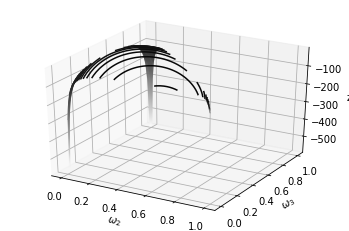

In [105]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Omega2, Omega3, -Z, 100, cmap='binary')
ax.set_xlabel(r'$\omega_2$')
ax.set_ylabel(r'$\omega_3$')
ax.set_zlabel('z');